In [1]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('heart_v2.csv')
df.head(10)

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0
5,65,1,120,177,0
6,56,1,130,256,1
7,59,1,110,239,1
8,60,1,140,293,1
9,63,0,150,407,1


In [3]:
df['heart disease'].value_counts()

0    150
1    120
Name: heart disease, dtype: int64

In [4]:
X=df.drop('heart disease', axis=1)
y=df['heart disease']

## Splitting train test

In [5]:
from sklearn.model_selection import train_test_split


In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=13)
X_train.shape

(189, 4)

## building decision tree
### using all the default parameters


In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
dt=DecisionTreeClassifier(max_depth=3)

In [9]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [12]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

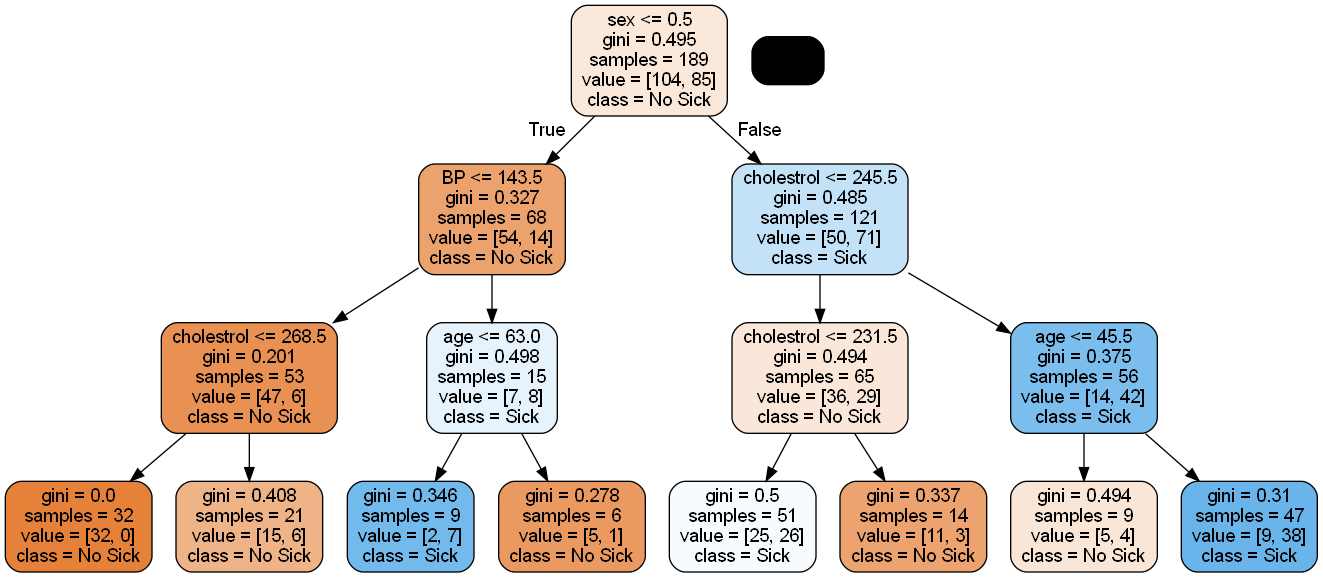

In [13]:
dot_data=StringIO()
export_graphviz(dt,out_file=dot_data,filled=True, rounded=True,
                feature_names=X.columns, class_names=['No Sick', 'Sick'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## checkin model performance

In [14]:
y_train_pred=dt.predict(X_train)
y_test_pred=dt.predict(X_test)


In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [16]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train,y_train_pred)

0.7354497354497355


array([[68, 36],
       [14, 71]], dtype=int64)

## Test performance

In [17]:
print(accuracy_score(y_test,y_test_pred))
confusion_matrix(y_test,y_test_pred)

0.6049382716049383


array([[23, 23],
       [ 9, 26]], dtype=int64)